In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from LLS import LLS

In [15]:
data = pd.read_csv('input\housePrice.csv')
data.head()  

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [16]:
data["Parking"] = data["Parking"].replace(["True","False"], [1,0])
data["Warehouse"] = data["Warehouse"].replace(["True","False"], [1,0])
data["Elevator"] = data["Elevator"].replace(["True","False"], [1,0])
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [17]:
data.drop("Address", axis=1, inplace=True)

In [18]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


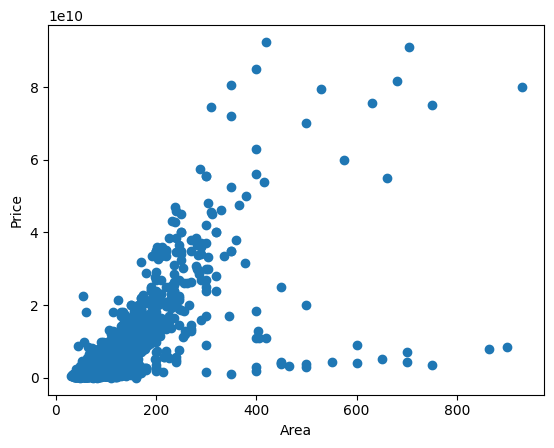

In [22]:
plt.scatter(data['Area'],data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [23]:
X = np.array(data[['Area']])
Y = np.array(data[['Price']])

print(X.shape)
print(Y.shape)

(3473, 1)
(3473, 1)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2604, 1)
(869, 1)
(2604, 1)
(869, 1)


In [25]:
lls = LLS()
lls.fit(X_train, Y_train)

y_pred = lls.predict(X_test)

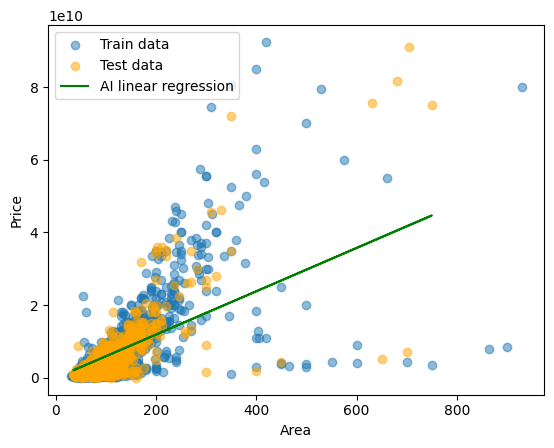

In [28]:
plt.scatter(X_train,Y_train,alpha=.5,label='Train data')
plt.scatter(X_test,Y_test, color='orange',alpha=.5,label='Test data')
plt.plot(X_test, y_pred, color='g',label='AI linear regression')
# plt.plot(X_train, 1 * X_train , color='r',label='Manual linear regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()

plt.show()

In [29]:
lls.evaluate(X_test,Y_test,metric='mae')

3252103532.017676

### Preprocess
